Different Classification Problems
1. Binary Classification (one thing or Another)
2. Multiclass Classification (more than one thing or another)
3. Multilabel Classification (multiple lable options per sample)

#What we are going to cover in this


1. Architecture of a Neural Network Classification model
2. Input shapes and output shapes of a Classification model(features and labes)
3. Creating custom Data to view and Fit
4. Steps in modelling
    1. Creating a Model
    2. Compiling a model
    3. Fitting a model
    4. Evaluating a model
5. Different classification Evaluation Metrics
6. Saving and Loading Models

#### Classification Problem

classification `inputs` and `outputs`

#### Input and output Tensors of classification

[Batch_size,Width,Height,Channels]

example: [None,224,224,3] or [32,224,224,3] or [32,224,224,1]

#### Typical Architecture of Neural Network classification problem with tensorflow

>Creating Data to View and Fit

In [1]:
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples=1000
#Create Circles
X,Y=make_circles(n_samples,
                noise=0.03,
                random_state=42)

In [2]:
#check the Features

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#check the Labels
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

our data is liitle harder to understand right now... Lets's visualize it!

In [4]:
import pandas as pd

In [5]:
circles=pd.DataFrame({"x0":X[:,0],"x1":X[:,1],"labels":Y})
circles

,x0,x1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


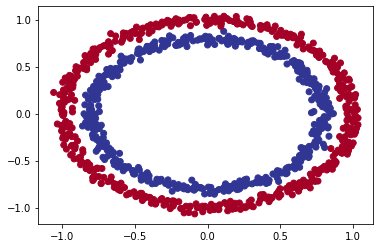

In [6]:
#Visualize with a Plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.RdYlBu)

>Input and Output shapes

In [7]:
#check the shapes of our Features and Labels
X.shape,Y.shape

((1000, 2), (1000,))

In [8]:
#How many samples we are working with?
len(X),len(Y)

(1000, 1000)

In [9]:
#View the first example of features and Labels
X[0],Y[0]

(array([0.75424625, 0.23148074]), 1)

In [10]:
X[17],Y[17]

(array([ 0.1070617, -0.7930922]), 1)

#Steps in Modelling

1. create or Import the model
2. compile the Model
3. Fit the model
4. Evaluate the model
5. tweak
6. Evaluate
.....

In [11]:
import tensorflow as tf

In [12]:
#set the random state
tf.random.set_seed(42)

# 1. create  the model using Sequential API
Circles_model

NameError: name 'Circles_model' is not defined

In [13]:
#set the random state
tf.random.set_seed(42)

# 1. create  the model using Sequential API
Circles_model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the Model
Circles_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["accuracy"])

# 3.Fit the model
Circles_model_1.fit(X,Y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 4.8533 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 2.3549 - accuracy: 0.4810
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7490 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4890


In [14]:
#Lets try and improve our model by traing for longer
Circles_model_1.fit(X,Y,epochs=200,verbose=0)

In [15]:
Circles_model_1.evaluate(X,Y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are Working on Binary classification Problem and our model is getting arround 50% accuracy it is performing as if it is guessing

so let's step things up a notch and add an extra layer.

In [16]:
#set the random seed
tf.random.set_seed(42)

# 1. Create a Model using Sequential API
Circles_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model\
Circles_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["accuracy"])

# 3. Fit the model
Circles_model_2.fit(X,Y,epochs=100,verbose=0)

In [17]:
# 4. Evaluate the model (not ideal using the same training data)
Circles_model_2.evaluate(X,Y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6935055255889893, 0.5]

In [18]:
circles["labels"].value_counts()

1    500
0    500
Name: labels, dtype: int64

>Improving our model

Let's see our bag of tricks to see how we can improve our model.


1. Create a Model-Here we might add more layers or increase the number of hidden units within the layer
2. Compiling a Model - Here we might want to choose different optimization function
3. Fit a Model - Perhaps we might fit our model for more epochs(leave it training for longer).

In [19]:
#set the Random seed
tf.random.set_seed(42)

# 1. Create a Model using Sequential API (this time 3 layers)
Circles_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a Model
Circles_model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

# 3. fit the model
Circles_model_3.fit(X,Y,epochs=100,verbose=0)

In [20]:
# 4. Evaluate of our model
Circles_model_3.evaluate(X,Y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6990 - accuracy: 0.5110


[0.6990456581115723, 0.5109999775886536]

To visualize our models prediction.Let's Create a function `plot_decision_boundary()`. This function will:

* Take in a Trained model, features(X) and labels(Y)
* Create the Meshgrid of the different X values
* Make Predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)

In [21]:
x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
y_min,y_max=X[:,1].min()-0.1,X[:,0].max()+0.1
x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1337117525463374)

In [22]:
import numpy as np

def plot_decision_boundary(model,X,Y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    #Define the Axis boundaries of the plot and Create a meshgrid
    x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
    y_min,y_max=X[:,1].min()-0.1,X[:,0].max()+0.1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
    
    #Create X value(we are going to make predictions on these)
    x_in=np.c_[xx.ravel(),yy.ravel()]  #stack 2D arrays together
    
    #make predictions
    y_pred=model.predict(x_in)
    
    #check for Mult-class
    if len(y_pred[0])>1:
        print("doing Multi-class classification")
        #we have to reshape our predictions to get them ready for plotting
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("doing Binary classification")
        y_pred=np.round(y_pred).reshape(xx.shape)
        
    #plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=Y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 2ms/step
doing Binary classification


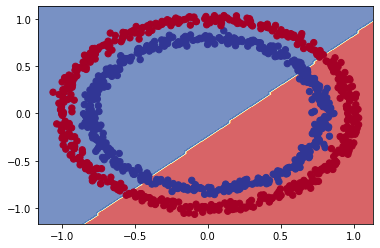

In [23]:
#check out the predictions of our model making

plot_decision_boundary(model=Circles_model_3,
                      X=X,
                      Y=Y)

1. CS232 neural network case study
2. madewithML

In [24]:
#Let's see if we can use our model for Regression Problem..

In [25]:
#set random seed
tf.random.set_seed(42)

#create some Regression data
X_regression=tf.range(0,1000,5)
Y_regression=tf.range(100,1100,5)  #Y=X+100


#split our Regression data into training and Test sets
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=Y_regression[:150]
y_reg_test=Y_regression[150:]


#fit our circles classification model to the regression data
Circles_model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for Binary Classification problem.

But Now we are working on Regression Problem,Lets change the model to suit our data

In [26]:
#set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

#3. fit the model
model_4.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 7ms/step - loss: 422.4193 - mae: 422.4193
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 320.6218 - mae: 320.6218
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 221.3968 - mae: 221.3968
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 116.8428 - mae: 116.8428
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 48.9584 - mae: 48.9584
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 80.4848 - mae: 80.4848
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 69.2050 - mae: 69.2050
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 44.1851 - mae: 44.1851
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 50.7293 - mae: 50.7293
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 42.9465 - mae: 42.9465
Epoch 11/100
5/5 [==============================] -

5/5 [==============================] - 0s 8ms/step - loss: 39.1388 - mae: 39.1388
Epoch 88/100
5/5 [==============================] - 0s 8ms/step - loss: 38.9315 - mae: 38.9315
Epoch 89/100
5/5 [==============================] - 0s 4ms/step - loss: 39.1696 - mae: 39.1696
Epoch 90/100
5/5 [==============================] - 0s 5ms/step - loss: 38.8759 - mae: 38.8759
Epoch 91/100
5/5 [==============================] - 0s 5ms/step - loss: 38.5859 - mae: 38.5859
Epoch 92/100
5/5 [==============================] - 0s 5ms/step - loss: 38.7111 - mae: 38.7111
Epoch 93/100
5/5 [==============================] - 0s 5ms/step - loss: 38.7681 - mae: 38.7681
Epoch 94/100
5/5 [==============================] - 0s 4ms/step - loss: 38.5423 - mae: 38.5423
Epoch 95/100
5/5 [==============================] - 0s 5ms/step - loss: 38.4787 - mae: 38.4787
Epoch 96/100
5/5 [==============================] - 0s 4ms/step - loss: 38.7399 - mae: 38.7399
Epoch 97/100
5/5 [==============================] - 0s 5ms/step

In [27]:
#make predictions using our Trained model

y_reg_preds=model_4.predict(X_reg_test)
y_reg_preds

2/2 [==============================] - 0s 1ms/step


array([[ 887.77374],
       [ 893.63055],
       [ 899.6607 ],
       [ 905.4039 ],
       [ 911.29926],
       [ 917.17975],
       [ 922.95807],
       [ 928.88824],
       [ 934.73486],
       [ 940.585  ],
       [ 946.43665],
       [ 952.2518 ],
       [ 958.146  ],
       [ 963.97363],
       [ 969.8676 ],
       [ 975.7471 ],
       [ 981.64166],
       [ 987.519  ],
       [ 993.32196],
       [ 999.1563 ],
       [1005.05176],
       [1010.9726 ],
       [1016.7783 ],
       [1022.73285],
       [1028.5258 ],
       [1034.307  ],
       [1040.2576 ],
       [1046.1519 ],
       [1052.0555 ],
       [1057.8147 ],
       [1063.6757 ],
       [1069.6215 ],
       [1075.4224 ],
       [1081.3536 ],
       [1087.1647 ],
       [1093.0404 ],
       [1098.8744 ],
       [1104.7162 ],
       [1110.5981 ],
       [1116.4437 ],
       [1122.3011 ],
       [1128.1438 ],
       [1134.091  ],
       [1139.9197 ],
       [1145.8574 ],
       [1151.6843 ],
       [1157.5692 ],
       [1163.

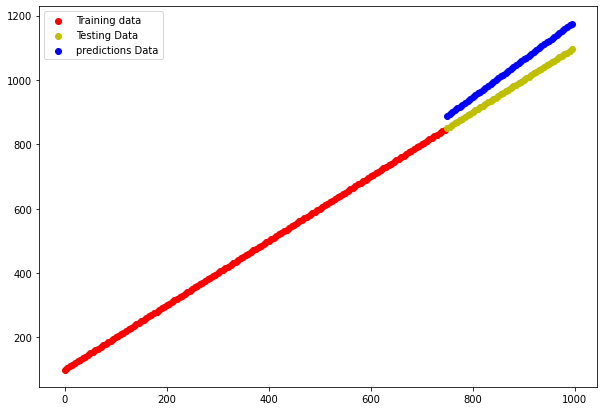

In [28]:
#plot the model's predictions against the Regression data

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='r',label='Training data')
plt.scatter(X_reg_test,y_reg_test,c='y',label="Testing Data")
plt.scatter(X_reg_test,y_reg_preds,c='b',label="predictions Data")
plt.legend();


`The missing Piece: Non Linearity`

In [29]:
#set random seed
tf.random.set_seed(42)

# 1. Create the Model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history=model_5.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 4.3131 - accuracy: 0.4190
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2281 - accuracy: 0.4100
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1015 - accuracy: 0.4130
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0232 - accuracy: 0.4260
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9505 - accuracy: 0.4400
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8850 - accuracy: 0.4430
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7820 - accuracy: 0.4440
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7174 - accuracy: 0.4450
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6033 - accuracy: 0.4440
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5013 - accuracy: 0.4540
Epoch 11/

32/32 [==============================] - 0s 5ms/step - loss: 0.8451 - accuracy: 0.4660
Epoch 84/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8432 - accuracy: 0.4660
Epoch 85/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8413 - accuracy: 0.4660
Epoch 86/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8395 - accuracy: 0.4660
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8377 - accuracy: 0.4660
Epoch 88/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8359 - accuracy: 0.4670
Epoch 89/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8342 - accuracy: 0.4670
Epoch 90/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8325 - accuracy: 0.4670
Epoch 91/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8308 - accuracy: 0.4650
Epoch 92/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8291 - accuracy: 0.4660
Epoch 93/100


In [30]:
X,Y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

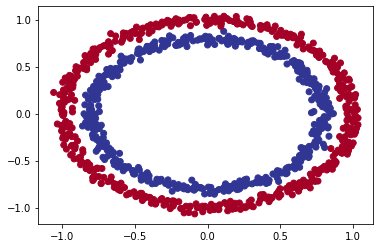

In [31]:
#check our data using visualization
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing Binary classification


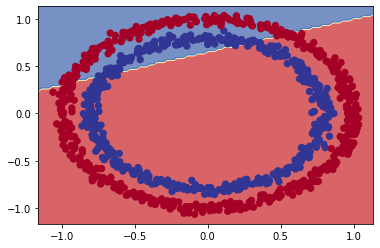

In [32]:
#Check the decision boundary for our latest model predictions
plot_decision_boundary(model=model_5,
                      X=X,
                      Y=Y)

#Lets Try to build first neural network with Non Linear activation function

In [33]:
#set random seed
tf.random.set_seed(42)

# 1.Create the Model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

# 2.Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# 3. Fit the model
history=model_6.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 5.4778 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 5.4509 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 5.4207 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 5.3913 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3901 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3732 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3535 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3419 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3388 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3367 - accuracy: 0.4790
Epoch 11/

32/32 [==============================] - 0s 5ms/step - loss: 4.4141 - accuracy: 0.4700
Epoch 84/100
32/32 [==============================] - 0s 5ms/step - loss: 4.4132 - accuracy: 0.4700
Epoch 85/100
32/32 [==============================] - 0s 6ms/step - loss: 4.4123 - accuracy: 0.4720
Epoch 86/100
32/32 [==============================] - 0s 6ms/step - loss: 4.4114 - accuracy: 0.4720
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 4.4106 - accuracy: 0.4720
Epoch 88/100
32/32 [==============================] - 0s 5ms/step - loss: 4.4097 - accuracy: 0.4720
Epoch 89/100
32/32 [==============================] - 0s 5ms/step - loss: 4.4089 - accuracy: 0.4720
Epoch 90/100
32/32 [==============================] - 0s 5ms/step - loss: 4.4079 - accuracy: 0.4720
Epoch 91/100
32/32 [==============================] - 0s 5ms/step - loss: 4.3999 - accuracy: 0.4710
Epoch 92/100
32/32 [==============================] - 0s 5ms/step - loss: 4.3763 - accuracy: 0.4710
Epoch 93/100


In [34]:
#Time to Replicate Multilayer-Neural Network from Tensorflow Playground in code

#set the Random seed
tf.random.set_seed(42)

# 1. Create the model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history=model_7.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 1.7669 - accuracy: 0.4600
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 1.1233 - accuracy: 0.4520
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 1.0591 - accuracy: 0.4490
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 1.0215 - accuracy: 0.4420
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9918 - accuracy: 0.4340
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9674 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9464 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9288 - accuracy: 0.4020
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9123 - accuracy: 0.3800
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.8975 - accuracy: 0.3560
Epoch 11/

32/32 [==============================] - 0s 5ms/step - loss: 0.5568 - accuracy: 0.8030
Epoch 84/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5514 - accuracy: 0.8180
Epoch 85/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5464 - accuracy: 0.8180
Epoch 86/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5425 - accuracy: 0.8130
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5366 - accuracy: 0.8130
Epoch 88/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5317 - accuracy: 0.8120
Epoch 89/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5263 - accuracy: 0.8200
Epoch 90/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5218 - accuracy: 0.8130
Epoch 91/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5159 - accuracy: 0.8320
Epoch 92/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5102 - accuracy: 0.8330
Epoch 93/100


In [35]:
#Evaluate the model
model_7.evaluate(X,Y)

32/32 [==============================] - 0s 4ms/step - loss: 0.4581 - accuracy: 0.8440


[0.45809406042099, 0.843999981880188]

313/313 [==============================] - 1s 2ms/step
doing Binary classification


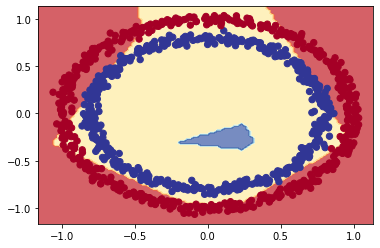

In [36]:
#How do our model_7 prediction values look?

plot_decision_boundary(model=model_7,
                      X=X,
                      Y=Y)

In [37]:
#set random seed
tf.random.set_seed(42)

# 1.Create The Model
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history=model_8.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6952 - accuracy: 0.5020
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6948 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6945 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.4930
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6942 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4670
Epoch 11/

32/32 [==============================] - 0s 5ms/step - loss: 0.6602 - accuracy: 0.5580
Epoch 84/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6581 - accuracy: 0.5980
Epoch 85/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6564 - accuracy: 0.5930
Epoch 86/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6546 - accuracy: 0.6210
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6523 - accuracy: 0.6200
Epoch 88/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.5950
Epoch 89/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6486 - accuracy: 0.6090
Epoch 90/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6469 - accuracy: 0.6070
Epoch 91/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6449 - accuracy: 0.6220
Epoch 92/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6430 - accuracy: 0.6470
Epoch 93/100


In [38]:
# 4. Evaluate the model
model_8.evaluate(X,Y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6274 - accuracy: 0.6390


[0.6274297833442688, 0.6389999985694885]

313/313 [==============================] - 1s 2ms/step
doing Binary classification


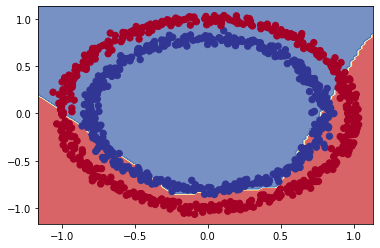

In [39]:
#Lets Visualize our incredible metrics
plot_decision_boundary(model=model_8,
                      X=X,
                      Y=Y)

**Question**: What's Wrong the predictions we've made? Are we really evaluating our model correctly?
    Hint: what data did the model learn on and what data did we predict on?
        

what could you draw if you had an unlimited amount of straight(Linear) Lines and non straight(Non-Linear) Lines?

**Note:** the combination of **Linear(straight lines) and Non-Linear(Non straight Lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of Linear and non-Linear functions or (lines), Let's see Them in action

In [40]:
#Create a Toy Tensor (which is very similar to the data we pass into our models)

A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

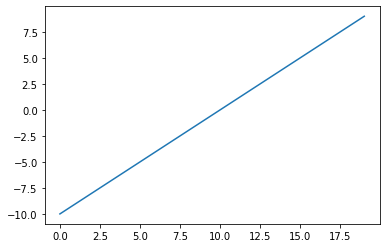

In [41]:
#Visualize our Toy Tensor
plt.plot(A)

In [42]:
#Let's start by Replicating Sigmoid : Sigmoid(x)=1/(1 + exp(-x))

def sigmoid(x):
    return 1/(1+tf.exp(-x))


#Use the Sigmoid function on our toy Tensor

sigmoid(A)
    

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

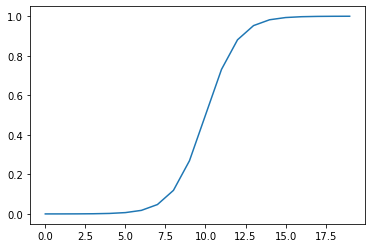

In [43]:
#plot our Toy Tensor which is Transformed by Sigmoid
plt.plot(sigmoid(A));

In [44]:
#Lets Recreate the Relu function

def relu(x):
    return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

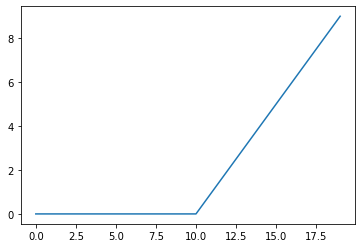

In [45]:
#Plot our Toy Tensor which is Transformed by Relu
plt.plot(relu(A));

In [46]:
#lets Try the Linear activation Function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

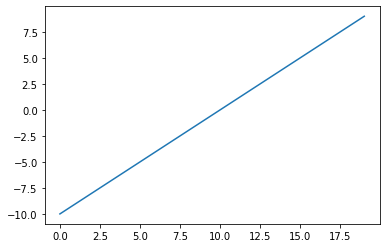

In [47]:
#Does the Linear activation function change anything?

plt.plot(tf.keras.activations.linear(A));

In [48]:
#Does A even change?

A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

### Evaluating and Improving Classification model

So far we've been training and testing on same dataset....
however in Machine Learning this is basically a sin
So let's create a Training and test data sets

In [49]:
len(X)

1000

In [50]:
#Split into train and test sets

X_train,y_train=X[:800],Y[:800]
X_test,y_test=X[800:],Y[800:]

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [52]:
#Lets's Recreate a Model to fit on training Data and Evaluate on Testing Data


#set the Random seed
tf.random.set_seed(42)


# 1. create the Model
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


# 2. Compile the Model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

# 3. Fit the model
history=model_9.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.5450
Epoch 2/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6755 - accuracy: 0.5900
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.6112
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6483 - accuracy: 0.6363
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6293 - accuracy: 0.6700
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.6963
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5480 - accuracy: 0.8462
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5036 - accuracy: 0.8450
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4354 - accuracy: 0.9200
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.9750
Epoch 11/25
25/25 [

In [53]:
# Evaluate the model on Test dataset
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0611 - accuracy: 0.9950


[0.061101824045181274, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing Binary classification
313/313 [==============================] - 1s 2ms/step
doing Binary classification


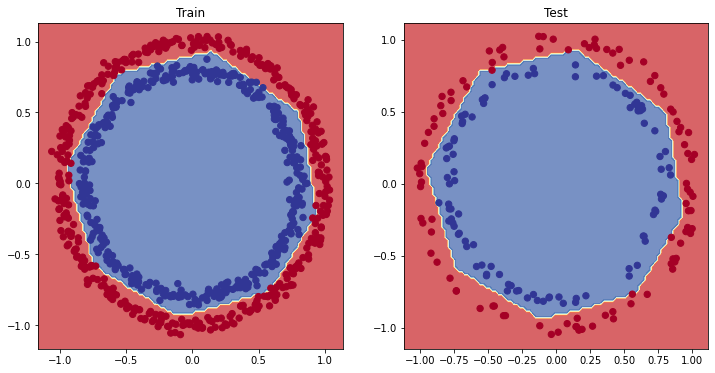

In [54]:
#plot the decision boundary for both training and test dataset

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_9,
                      X=X_train,
                      Y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_9,
                      X=X_test,
                      Y=y_test)
plt.show();

### Plot the Loss(or Training ) curves

In [55]:
history.history

{'loss': [0.6842349767684937,
  0.6754501461982727,
  0.6648791432380676,
  0.6482740640640259,
  0.629326581954956,
  0.5945303440093994,
  0.5479591488838196,
  0.5036264657974243,
  0.43544283509254456,
  0.36302292346954346,
  0.30484265089035034,
  0.254547119140625,
  0.21551664173603058,
  0.18153879046440125,
  0.15503430366516113,
  0.13993380963802338,
  0.12479612231254578,
  0.11171455681324005,
  0.09994996339082718,
  0.09797143936157227,
  0.08717842400074005,
  0.08034899830818176,
  0.07351847738027573,
  0.07254699617624283,
  0.06631903350353241],
 'accuracy': [0.5450000166893005,
  0.5899999737739563,
  0.6112499833106995,
  0.6362500190734863,
  0.6700000166893005,
  0.6962500214576721,
  0.8462499976158142,
  0.8450000286102295,
  0.9200000166893005,
  0.9750000238418579,
  0.9750000238418579,
  0.9825000166893005,
  0.9900000095367432,
  0.9912499785423279,
  0.9912499785423279,
  0.9925000071525574,
  0.9937499761581421,
  0.9975000023841858,
  0.996249973773956

In [56]:
#Convert the history object to dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684235,0.54500
1,0.675450,0.59000
2,0.664879,0.61125
3,0.648274,0.63625
4,0.629327,0.67000
5,0.594530,0.69625
6,0.547959,0.84625
7,0.503626,0.84500
8,0.435443,0.92000
9,0.363023,0.97500


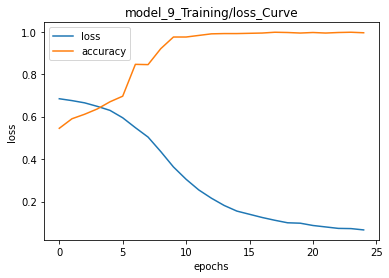

In [57]:
#Plot the loss or Training Curve
pd.DataFrame(history.history).plot()
plt.title("model_9_Training/loss_Curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show();

**Note:** For many problems,the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels)

### Using Callbacks to find a model's ideal learning Rate

To find the ideal Learning Rate(the learning rate where the loss decreases the most during Training) we are going to use the following steps:

* A learning rate **Callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* it's training.
* Another model(we could use the same one as above, but we're  practicing building models here).
* A modeified Loss curve plot.

At the Beginning of every Epoch,this callback get's the updated learning Rate value from `schedule` function provided at __init__, with the current epoch and the current learning rate, and applies the updated learning rate on the Optimizer

In [58]:
#set the Random seed
tf.random.set_seed(42)


# 1. Create The model using Sequential API
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#There are different Types Callbacks
#Create the Learning Rate Callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# 3. Fit the model(This time we are going to pass Lr_scheduler callback)
history_10=model_10.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5075 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5050 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5088 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.5075 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5100 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0720 - accuracy: 0.9737 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2552 - accuracy: 0.9087 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2389 - accuracy: 0.9087 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2287 - accuracy: 0.9237 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8562 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6637 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5475 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5088 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.5

<Axes: xlabel='epochs'>

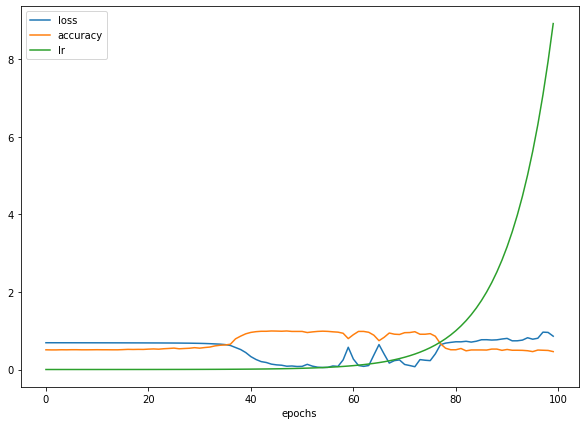

In [59]:
pd.DataFrame(history_10.history).plot(figsize=(10,7),xlabel="epochs")

In [60]:
#Plot The learning Rate versus Loss
lrs=1e-4*10**(tf.range(100)/20)
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

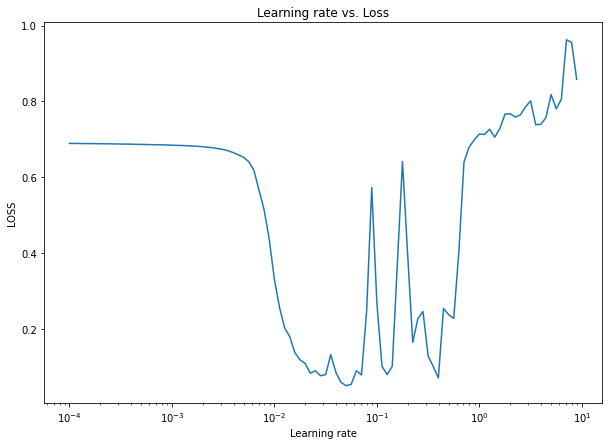

In [61]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_10.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("LOSS")
plt.title("Learning rate vs. Loss")
plt.show();

In [62]:
#Example of other Typical learning Rate values:
10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [63]:
#Let's Try using **Higher** Learning Rate with the same Model

#set the Random seed
tf.random.set_seed(42)

# 1. Create the Model
model_11=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


# 2.  Compile the Model with Ideal Learning rate from the above plot
model_11.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])


# 3. Fit the Model
history_11=model_11.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5350
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5738
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6629 - accuracy: 0.5863
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6162 - accuracy: 0.7050
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5422 - accuracy: 0.7750
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4211 - accuracy: 0.9062
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3085 - accuracy: 0.9475
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2143 - accuracy: 0.9625
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1573 - accuracy: 0.9837
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1154 - accuracy: 0.9962
Epoch 11/20
25/25 [

In [64]:
#Evaluate Model_11 on Test data
model_11.evaluate(X_test,y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.0353 - accuracy: 0.9900


[0.035278916358947754, 0.9900000095367432]

In [65]:
#Evaluate model_9 on Test data
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.0611 - accuracy: 0.9950


[0.061101824045181274, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing Binary classification
313/313 [==============================] - 1s 2ms/step
doing Binary classification


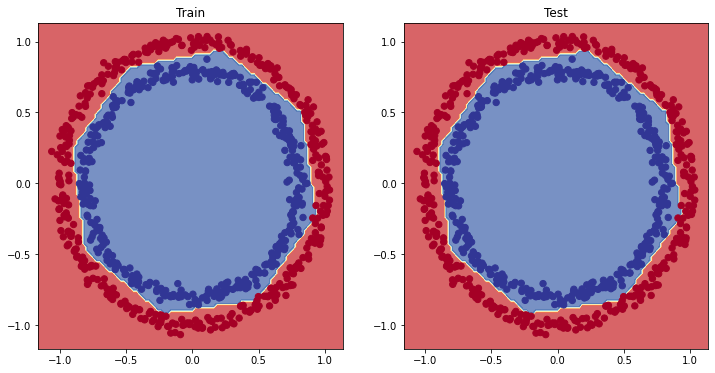

In [66]:
#plot The decision boundaries on Training and Test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_11,
                      X=X_train,
                      Y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_11,
                      X=X_train,
                      Y=y_train)
plt.show();

### Introduction to More Classification Evaluation Metrics

Unfortunately, We can't have Both Precision and Recall High, if you increase Precision,it will reduce recall, and vice versa. This is called The **Precision/Recall Tradeoff** 

#More Classification Evaluation Metrics


Alongside Visualizing our model results as much as posible.there are a handful of other classification Evaluation  methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report(from Scikit Learn) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [67]:
#Check The Accuracy of our Model
loss,accuracy=model_11.evaluate(X_test,y_test)
print(f"Model Loss on the Test set:{loss}")
print(f"Model accuracy on the Test Set:{accuracy*100:.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9900
Model Loss on the Test set:0.035278916358947754
Model accuracy on the Test Set:99.00%


How about a Confusion Matrix?

### Creating our first Confusion Matrix(to see where our Model is getting Confused)

### Anatomy of a Confusion Matrix

* **y_axis**=`Truth Labels`
* **X_axis**=`Predicted Labels`



* **True Positive:** Model Predicts `1` when truth is `1`
* **True Negative:** Model Predicts `0` when truth is `0`
* **False Positive:** Model Predicts `1` when Truth is `0`
* **False Negative:** Model Predicts `0` when Truth is `1`

In [69]:
#Create a Confusion Matrix
from sklearn.metrics import confusion_matrix

#Make Predictions
y_pred=model_11.predict(X_test)

#Create Confusion Matrix
confusion_matrix(y_test,y_pred)

7/7 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [70]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [71]:
y_pred[:10]

array([[0.99555933],
       [0.9984962 ],
       [0.9861033 ],
       [0.997056  ],
       [0.07346289],
       [0.00118394],
       [0.9070742 ],
       [0.00133963],
       [0.99841833],
       [0.02335929]], dtype=float32)

Oops.. Looks like our Prediction array has come out in  **prediction probability** form... The standard output from the sigmoid (or Softmax) activation functions.

In [72]:
#Convert the prediction probabilty to binary format and view the first 10
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [73]:
#Create the Confusion Matrix
confusion_matrix(y_test,tf.round(y_pred))

array([[100,   1],
       [  1,  98]], dtype=int64)

### Making our Confusion Matrix Prettier

`How about we Prettify our Confusion Matrix?`

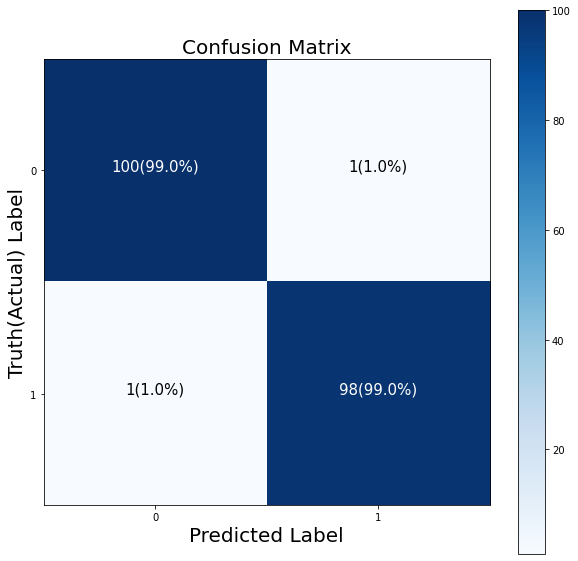

In [89]:
#Note: The Confusion Matrix code we are about to write is a remix of scikit-learn's Plot_confusion_matrix
#https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/metrics/_plot/confusion_matrix.py#L462

import numpy as np
import itertools

figsize=(10,10)

#Create the Confusion Matrix
cm=confusion_matrix(y_test,tf.round(y_pred))
cm_norm=cm.astype(float)/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion matrix
n_classes=cm.shape[0]

#Let's Prettify it
fig,ax=plt.subplots(figsize=figsize)
#Create a Matrix Plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create Classes
classes=False

if classes:
    labels=classes
else:
    labels=np.arange(cm.shape[0])
    
#Label The Axes
ax.set(title="Confusion Matrix",
      xlabel="Predicted Label",
      ylabel="Truth(Actual) Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

#set X-axis label to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()


#Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

#set the Threshold for different colours
threshold=(cm.max()+cm.min())/2


#plot the Text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size=15)

## Working With Larger Dataset(Multiclass Classification)

 When you have more than two classes as an option it is known as **MultiClass Classification**
 
 * This means if we have 3 different classes, it's Multi-class Classification.
 * It is also means if we have 100 different classes, it's Multi-Class Classification

To practice a Multi-Class Classification, we are going to build a neural network to classify images of different items of clothing.

fasion-Mnist data has 60,000 Training samples 10,000 Test samples has 10 classes whose image shape is 28*28 gray scale image

In [92]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data is already been sorted/split into Training and Test sets for us
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [94]:
#Show the First Training Example

print(f"Training sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [97]:
#Check the shape of Single Example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

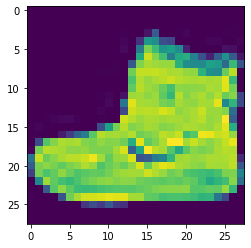

In [98]:
#Plot the single Sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

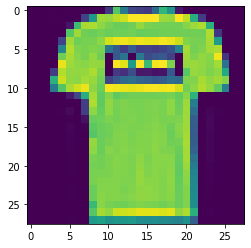

In [99]:
#plot the second sample
plt.imshow(train_data[1]);

In [101]:
#check the sample labels
train_labels[1]

0

In [103]:
#Create a Small list so we can index onto our Traing Labels so they are human readable
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

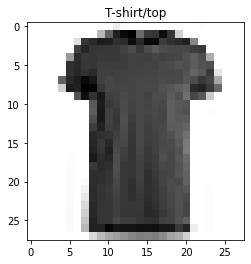

In [113]:
#Plot an Example Image and it's label
index_of_choice=17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])



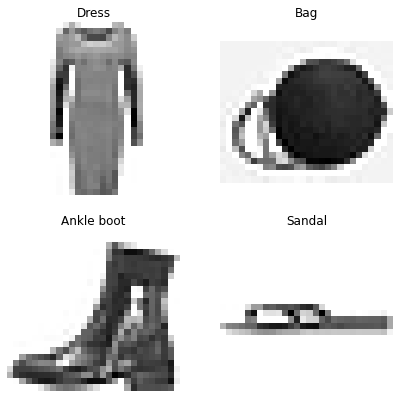

In [123]:
#plot Multiple random images of fashion Mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

> **Building a Multi-Class Classification Model**



For our Multi-class classification model,we can use a similar architecture which we used for binary classifiers,however,we're going to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape=10 (one per class of clothing)
* Loss Function=tf.keras.losses.CategoricalCrossentropy()
* Output Layer Activation = Softmax (not Sigmoid)

In [125]:
#Let's Build the model
#set random state
tf.random.set_seed(42)

# 1. Create The Model
model_12=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)       #or instead use "softmax"
])


# 2. Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 3. Fit the model
non_norm_history=model_12.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data,test_labels))

Epoch 1/10


ValueError: in user code:

    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32,) and (32, 28, 10) are incompatible


In [131]:
#our data needs to be Flattened (from 28*28 to None,784)
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

**Neural Network likes everything to be in one Long Vector and will pass it to other layers**

In [133]:
#set the Random seed
tf.random.set_seed(42)

# 1. Create The Model
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
non_norm_history=model_12.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data,test_labels))


Epoch 1/10


ValueError: in user code:

    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\gowth\anaconda3\envs\ML\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


The Error is with Respect to Output shape/Use of CategoricalCrossentropy

In [134]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

train_labels, the label data are in the form of integer

* Use this CategoricalCrossEntropy loss function when there are two or more label classes. We expect labels to be provided in a **one Hot representation**. 
* if you want to provide labels as integers,please use **SparseCategoricalCrossentropy**

In [135]:
#set Random seed
tf.random.set_seed(42)

#1. Create the Model
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2. Compile the Model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
non_norm_history=model_12.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data,test_labels))



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3265 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [140]:
#or Alternatively we can represent label data in One Hot Representaion form
tf.one_hot(train_labels[:10],depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [144]:
#set the Random seed
tf.random.set_seed(42)

#create the Model
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2. compile The model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the Model
non_norm_history=model_12.fit(train_data,
                             tf.one_hot(train_labels,depth=10),
                             epochs=10,
                             validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2133 - accuracy: 0.1394 - val_loss: 2.2426 - val_accuracy: 0.1236
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0443 - accuracy: 0.1849 - val_loss: 1.8555 - val_accuracy: 0.2459
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7015 - accuracy: 0.2882 - val_loss: 1.5901 - val_accuracy: 0.3349
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5474 - accuracy: 0.3481 - val_loss: 1.5102 - val_accuracy: 0.3529
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4964 - accuracy: 0.3506 - val_loss: 1.4843 - val_accuracy: 0.3584
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4687 - accuracy: 0.3532 - val_loss: 1.4523 - val_accuracy: 0.3610
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4415 - accuracy: 0.3659 - val_loss: 1.4338 - val_accuracy:

## Improving Performance using Normalization

In [145]:
#Check the Model summary
model_12.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 4)                 3140      
                                                                 
 dense_51 (Dense)            (None, 4)                 20        
                                                                 
 dense_52 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [146]:
#check the Min and Max values of Training Data
train_data.min(),train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or Normalized), this means they like to have the numbers in the tensors they try to find the patterns between 0 and 1.

In [147]:
#We can get our train and test data between 0 and 1 by dividing by the Maximum
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [148]:
#We can test the min and max of scaled data
train_data_norm.min(),train_data_norm.max()


(0.0, 1.0)

In [149]:
test_data_norm.min(),test_data_norm.max()

(0.0, 1.0)

In [151]:
#Now our data is scaled,Let's build the model to find patterns in it

#Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2. compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 3. fit the model
norm_history=model_13.fit(train_data_norm,
                         train_labels,
                         epochs=10,
                         validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1601 - accuracy: 0.5859 - val_loss: 0.7898 - val_accuracy: 0.7175
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7211 - accuracy: 0.7395 - val_loss: 0.7116 - val_accuracy: 0.7486
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6415 - accuracy: 0.7676 - val_loss: 0.6376 - val_accuracy: 0.7734
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6025 - accuracy: 0.7778 - val_loss: 0.6220 - val_accuracy: 0.7747
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5843 - accuracy: 0.7831 - val_loss: 0.6144 - val_accuracy: 0.7817
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5713 - accuracy: 0.7879 - val_loss: 0.6089 - val_accuracy: 0.7821
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5621 - accuracy: 0.7936 - val_loss: 0.5952 - val_accuracy:

**Note:** Neural Networks tend to prefer data in numerical form as well as scaled/Normalized(numbers between 0 and 1)

Lets Compare loss curves of Normalized data model vs. Non-Normalized data model

<Axes: title={'center': 'Normalized data'}>

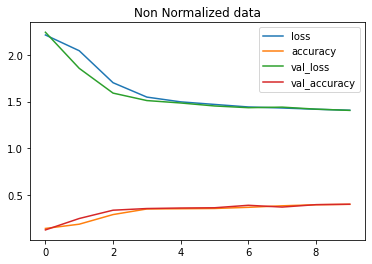

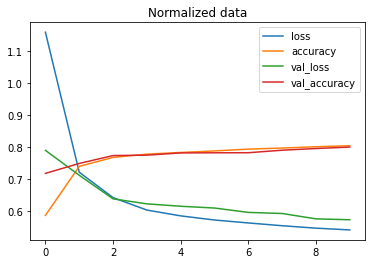

In [153]:
import pandas as pd
#plot Non-Normalized data model loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non Normalized data")
#plot Normalized data model loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** the same model with even **slightly** different data can produce dramatically different Results. so When you're comparing Models, it's important to make sure you are comparing them on the same criteria(e.g. same architecture but different data or same data but different architecture).

### Finding Ideal Learning Rate

* Ideal learning rate is the learning rate value where the Loss decreases the most

In [163]:
#set the Random seed
tf.random.set_seed(42)

# 1. Create the model
model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#2. compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Let's create a learning rate scheduler using callbacks
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))


# 3. Fit the model
finding_lr_history=model_14.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4005 - accuracy: 0.4393 - val_loss: 1.1567 - val_accuracy: 0.5166 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0252 - accuracy: 0.5929 - val_loss: 0.9509 - val_accuracy: 0.6435 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8328 - accuracy: 0.6775 - val_loss: 0.8249 - val_accuracy: 0.6702 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7438 - accuracy: 0.7163 - val_loss: 0.7549 - val_accuracy: 0.7250 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6842 - accuracy: 0.7694 - val_loss: 0.6893 - val_accuracy: 0.7707 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6445 - accuracy: 0.7777 - val_loss: 0.6708 - val_accuracy: 0.7758 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Learning rate decay curve/Finding Ideal Learning rate')

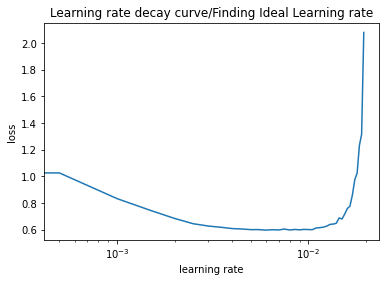

In [165]:
#plot the Learning Rate decay curve
import matplotlib.pyplot as plt
lrs=1e-3*10*(tf.range(40)/20)
plt.semilogx(lrs,finding_lr_history.history["loss"])
plt.ylabel("loss")
plt.xlabel("learning rate")
plt.title('Learning rate decay curve/Finding Ideal Learning rate')

In [164]:
10**-3

0.001

In [166]:
#Let's Build the model with Ideal learning rate value

#set the random seed
tf.random.set_seed(42)

# 1. create the model
model_15=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])


# 2.Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


#3. fit the model
history_15=model_15.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1603 - accuracy: 0.5684 - val_loss: 0.8870 - val_accuracy: 0.6785
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7631 - accuracy: 0.7307 - val_loss: 0.7211 - val_accuracy: 0.7446
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6604 - accuracy: 0.7638 - val_loss: 0.6783 - val_accuracy: 0.7511
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6177 - accuracy: 0.7742 - val_loss: 0.6355 - val_accuracy: 0.7689
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5959 - accuracy: 0.7795 - val_loss: 0.6348 - val_accuracy: 0.7651
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5822 - accuracy: 0.7849 - val_loss: 0.6135 - val_accuracy: 0.7764
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5744 - accuracy: 0.7869 - val_loss: 0.6164 - val_accuracy:

### Evaluating our Multi class classification Model

To Evaulate our Multi-Class Classification Model we could:
* Evaluate it's  performance using other classification metrics(such as confusion matrix)
* Access some of it's predictions (through Visualization)
* Improve it's Results (by training it for longer or changing the architecture)
* Save and Export it for use in an application
    

In [183]:
#Creating the confusion matrix

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
    #Create the Confusion Matrix
    cm=confusion_matrix(y_true,tf.round(y_pred))
    cm_norm=cm.astype(float)/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion matrix
    n_classes=cm.shape[0]

    #Let's Prettify it
    fig,ax=plt.subplots(figsize=figsize)
    #Create a Matrix Plot
    cax=ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)

    ##set labels to be classes


    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])

    #Label The Axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="Truth(Actual) Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    #set X-axis label to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()


    #Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    #set the Threshold for different colours
    threshold=(cm.max()+cm.min())/2


    #plot the Text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j]>threshold else "black",
                size=text_size)


In [168]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [171]:
#Make some predictions with our model
y_probs=model_15.predict(test_data_norm)  #probs is short for "prediction Probabilities"



#View the First Five Predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.8280003e-10, 5.4270195e-13, 5.5277892e-14, 9.2677212e-08,
        1.3818856e-10, 1.5253249e-01, 7.5135898e-09, 8.7311313e-02,
        5.0362865e-05, 7.6010579e-01],
       [8.1831776e-03, 1.7425453e-10, 7.4695009e-01, 8.4305073e-05,
        1.0215971e-03, 3.0051124e-09, 2.0489810e-01, 7.5320533e-15,
        3.8862731e-02, 3.5183524e-18],
       [7.3133793e-05, 9.9496776e-01, 2.7570620e-08, 4.7628451e-03,
        1.8714216e-04, 5.9802158e-10, 8.9880250e-06, 1.3630451e-22,
        8.1352210e-11, 3.0633310e-19],
       [2.4088036e-05, 9.9725854e-01, 3.8621635e-09, 2.6429244e-03,
        7.1144401e-05, 1.8681144e-10, 3.2310159e-06, 1.1322423e-23,
        2.1817100e-11, 8.5338279e-20],
       [1.8836042e-01, 5.5996421e-05, 1.8091294e-01, 4.6293702e-02,
        5.5129603e-02, 4.3272613e-07, 5.2546614e-01, 7.0003377e-15,
        3.7807983e-03, 5.4237584e-16]], dtype=float32)

**Note:** Remember to make predictions on same kind of data your model was trained on(e.g. if our model was trained on Normalized data,you want make predictions on Normalized Data).

In [172]:
y_probs[0]

array([1.8280003e-10, 5.4270195e-13, 5.5277892e-14, 9.2677212e-08,
       1.3818856e-10, 1.5253249e-01, 7.5135898e-09, 8.7311313e-02,
       5.0362865e-05, 7.6010579e-01], dtype=float32)

In [173]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [174]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [176]:
#Convert all of the prediction probabilities into integer
y_preds=y_probs.argmax(axis=1)

#View the first 10
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7], dtype=int64)

In [178]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[717,   0,  18,  81,  10,   3, 160,   0,  11,   0],
       [  0, 941,   2,  34,  17,   4,   2,   0,   0,   0],
       [ 12,   0, 665,   9, 220,   2,  90,   0,   2,   0],
       [ 28,   8,  10, 838,  40,  13,  58,   0,   5,   0],
       [  0,   0, 111,  32, 826,   2,  27,   0,   2,   0],
       [  0,   0,   0,   1,   1, 884,   0,  56,   6,  52],
       [138,   1, 338,  45, 247,   1, 212,   0,  18,   0],
       [  0,   0,   0,   0,   0,  40,   0, 895,   0,  65],
       [  1,   0,  33,   2,   3,   9,  21,   6, 925,   0],
       [  0,   0,   0,   0,   0,  30,   0,  22,   1, 947]], dtype=int64)

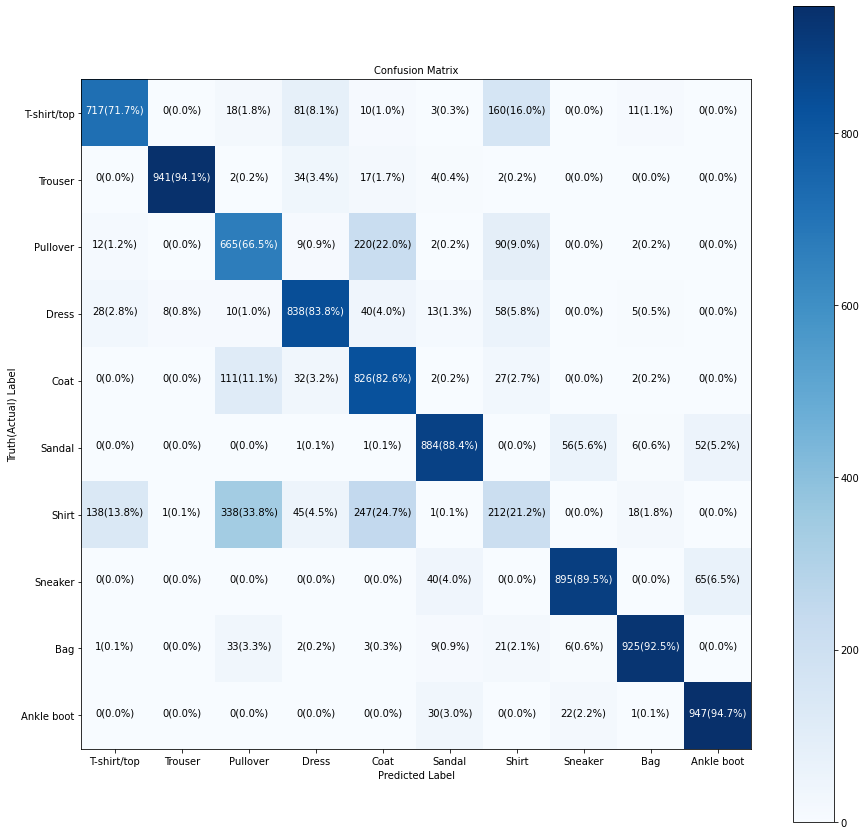

In [184]:
#Make a Prettier Confusion Matrix
make_confusion_matrix(y_true=test_labels,
                     y_pred=y_preds,
                     classes=class_names,
                     figsize=(15,15),
                     text_size=10)

### Visualizing Random model Predictions

**Note:** often when working with Images and other forms of visual data,it's a good idea to visualize as much as possible to develop the further understanding of the data and the inputs and outputs of your models


How about we create the fun little function for:
* Plot a random Image
* Make a prediction on said Image
* Label the plot with Truth label and the predicted label

In [189]:
import random
def plot_random_image(model,images,true_labels,classes):
    """
    picks a Random Image,plots it and labels it with prediction and truth label
    """
    #setup a Random integer
    i=random.randint(0,len(images))
    
    #Create Predictions and Target
    target_image=images[i]
    pred_probs=model.predict(target_image.reshape(1,28,28))
    pred_label=classes[pred_probs.argmax()]
    true_label=classes[true_labels[i]]
    
    #plot the Image
    plt.imshow(target_image,cmap=plt.cm.binary)
    
    #Change the colour of the titles depending on if the prediction is right or wrong
    if pred_label==true_label:
        color="green"
    else:
        color="red"
    
    #Add xlabel information (prediction/true Label)
    plt.xlabel("Pred: {}{:2.0f}% (True:{})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
              color=color)  #set the color to green or Red based on the prediction Right or Wrong

1/1 [==============================] - 0s 18ms/step


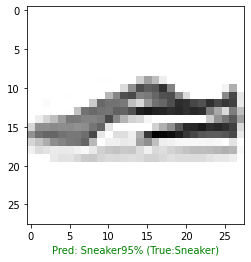

In [190]:
#Check out the Random image and it's prediction
plot_random_image(model=model_15,
                 images=test_data_norm,  #always make predictions on same kind of data your model was trained on
                 true_labels=test_labels,
                 classes=class_names)

## what `Patterns`is our model Learning?

In [191]:
#what patterns is our model Learning to make above kind of predictions?

In [192]:
#Find The Layers of our most recent model
model_15.layers

In [193]:
#Extract a particular layer
model_15.layers[1]

In [200]:
#Get the patterns of a layer in our network
weights,biases=model_15.layers[1].get_weights()

#shapes
weights,weights.shape

(array([[ 0.05427082, -0.0527029 ,  0.04609068,  0.35664544],
        [ 0.04994528, -0.6693046 , -0.15213154, -0.24701096],
        [-0.55796146, -0.5427222 , -0.54430425, -0.13940609],
        ...,
        [-0.61470664, -0.32226628, -0.05958917,  0.30933842],
        [ 0.02507522, -1.0756265 , -0.10540252, -0.2754213 ],
        [-0.43174455, -0.2095264 , -0.25321734, -0.17306298]],
       dtype=float32),
 (784, 4))

In [202]:
28*28

784

In [201]:
model_15.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_76 (Dense)            (None, 4)                 3140      
                                                                 
 dense_77 (Dense)            (None, 4)                 20        
                                                                 
 dense_78 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [204]:
 #Now lets's check out the bias vector
    
biases,biases.shape

(array([2.4922729, 2.1613967, 1.3398105, 2.1973844], dtype=float32), (4,))

Every Neuron has a bias Vector. Each of these is paired with a  weights matrix.

 Bias Vector also get initialized as zeros(at least in the case of Tensorflow Dense Layer)
 
 The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [205]:
model_15.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_76 (Dense)            (None, 4)                 3140      
                                                                 
 dense_77 (Dense)            (None, 4)                 20        
                                                                 
 dense_78 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


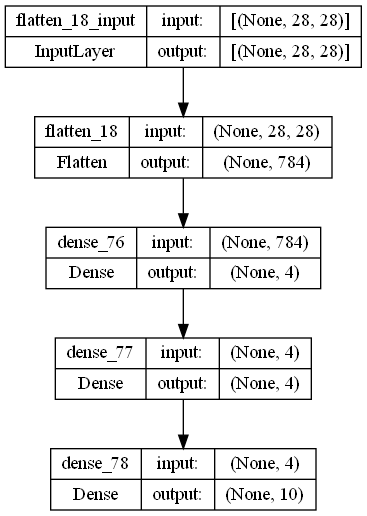

In [209]:
#Lets check  out another way of viewing our Deeplearning model
from tensorflow.keras.utils import plot_model
#see the inputs and ouputs of each layer
plot_model(model_15,show_shapes=True)

after installing !conda install pydot and conda install graphviz